<a href="https://colab.research.google.com/github/almeida-cma/SI_Tema9/blob/main/CidadesInt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

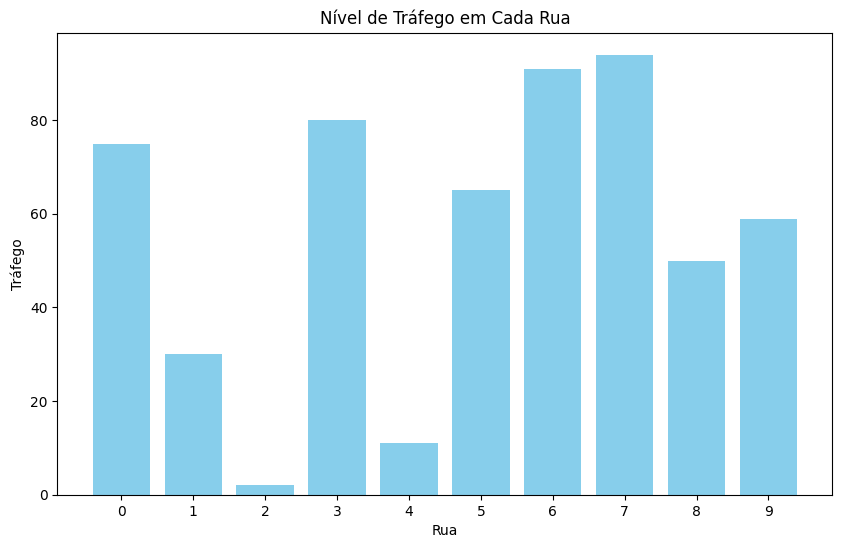

A rua mais congestionada é a rua 7 com um nível de tráfego de 94.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Número de ruas na cidade
num_ruas = 10

# Gerar dados de tráfego aleatórios para cada rua
dados_trafego = np.random.randint(0, 100, num_ruas)

# Plotar gráfico de barras para mostrar o tráfego em cada rua
plt.figure(figsize=(10, 6))
plt.bar(range(num_ruas), dados_trafego, color='skyblue')
plt.xlabel('Rua')
plt.ylabel('Tráfego')
plt.title('Nível de Tráfego em Cada Rua')
plt.xticks(range(num_ruas))
plt.show()

# Encontrar a rua mais congestionada
rua_mais_congestionada = np.argmax(dados_trafego)
nivel_congestionamento = dados_trafego[rua_mais_congestionada]

print(f"A rua mais congestionada é a rua {rua_mais_congestionada} com um nível de tráfego de {nivel_congestionamento}.")


Distribuição Inicial de Veículos:


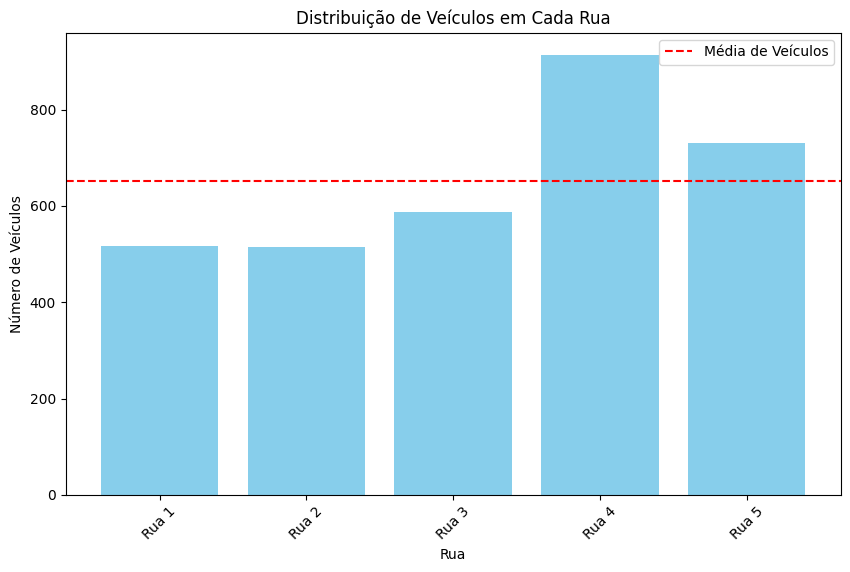


Distribuição Final de Veículos Após a Otimização:


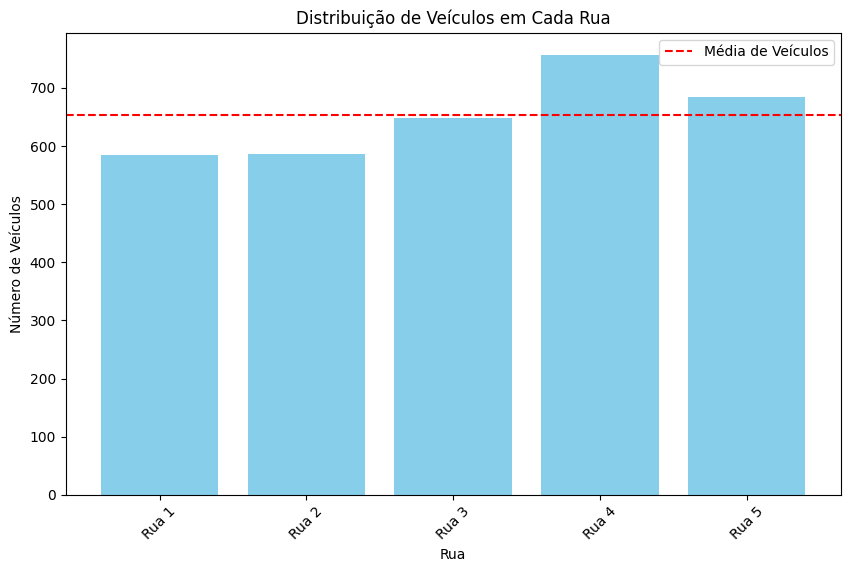


Alterações nas Ruas:
Rua 4 diminuiu em 157 veículos.
Rua 3 aumentou em 62 veículos.
Rua 1 aumentou em 68 veículos.
Rua 2 aumentou em 72 veículos.
Rua 5 diminuiu em 45 veículos.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Classe para representar uma Rua na cidade
class Rua:
    def __init__(self, nome):
        # Nome da rua
        self.nome = nome
        # Número inicial de veículos
        self.num_veiculos = 0

    def aumentar_veiculos(self, quantidade):
        # Método para aumentar o número de veículos na rua
        self.num_veiculos += quantidade

    def diminuir_veiculos(self, quantidade):
        # Método para diminuir o número de veículos na rua
        self.num_veiculos -= quantidade

    def zerar_veiculos(self):
        # Método para zerar o número de veículos na rua
        self.num_veiculos = 0

# Classe para representar uma Cidade Inteligente
class CidadeInteligente:
    def __init__(self, num_ruas):
        # Inicializa a cidade com um número específico de ruas
        self.ruas = [Rua(f"Rua {i+1}") for i in range(num_ruas)]
        self.alteracoes_ruas = {}

    def simular_distribuicao_inicial(self, num_veiculos):
        # Simula a distribuição inicial de veículos entre as ruas
        for rua in self.ruas:
            rua.aumentar_veiculos(np.random.randint(1, num_veiculos + 1))

    def otimizar_fluxo_trafego(self):
        # Otimiza o fluxo de tráfego balanceando o número de veículos entre as ruas

        # Calcula o número médio de veículos por rua
        total_veiculos = sum(rua.num_veiculos for rua in self.ruas)
        media_veiculos = total_veiculos / len(self.ruas)

        # Distribui o tráfego entre as ruas
        for rua in self.ruas:
            diferenca = int(rua.num_veiculos - media_veiculos)
            if diferenca > 0:
                # Se houver mais veículos do que a média, distribui para outras ruas
                for _ in range(diferenca):
                    outra_rua = np.random.choice(self.ruas)
                    if outra_rua != rua and outra_rua.num_veiculos < media_veiculos:
                        rua.diminuir_veiculos(1)
                        outra_rua.aumentar_veiculos(1)
                        self.alteracoes_ruas[rua.nome] = self.alteracoes_ruas.get(rua.nome, 0) - 1
                        self.alteracoes_ruas[outra_rua.nome] = self.alteracoes_ruas.get(outra_rua.nome, 0) + 1

    def visualizar_distribuicao(self):
        # Visualiza a distribuição de veículos em cada rua em forma de gráfico de barras
        nomes_ruas = [rua.nome for rua in self.ruas]  # Lista de nomes de ruas
        num_veiculos = [rua.num_veiculos for rua in self.ruas]  # Lista de números de veículos

        # Configuração e exibição do gráfico de barras
        plt.figure(figsize=(10, 6))
        plt.bar(nomes_ruas, num_veiculos, color='skyblue')
        plt.xlabel('Rua')
        plt.ylabel('Número de Veículos')
        plt.title('Distribuição de Veículos em Cada Rua')
        plt.axhline(y=np.mean(num_veiculos), color='red', linestyle='--', label='Média de Veículos')
        plt.legend()
        plt.xticks(rotation=45)  # Rotaciona os nomes das ruas para facilitar a leitura
        plt.show()

    def mostrar_alteracoes_ruas(self):
        # Mostra as alterações em cada rua após a otimização
        print("\nAlterações nas Ruas:")
        for rua, alteracao in self.alteracoes_ruas.items():
            if alteracao > 0:
                print(f"{rua} aumentou em {abs(alteracao)} veículos.")
            elif alteracao < 0:
                print(f"{rua} diminuiu em {abs(alteracao)} veículos.")
            else:
                print(f"{rua} não teve alteração.")

# Criar uma instância da Cidade Inteligente com 5 ruas
cidade = CidadeInteligente(5)

# Simular a distribuição inicial de 1000 veículos entre as ruas
cidade.simular_distribuicao_inicial(1000)

# Visualizar a distribuição inicial de veículos
print("Distribuição Inicial de Veículos:")
cidade.visualizar_distribuicao()

# Otimizar o fluxo de tráfego
cidade.otimizar_fluxo_trafego()

# Visualizar a distribuição final de veículos após a otimização
print("\nDistribuição Final de Veículos Após a Otimização:")
cidade.visualizar_distribuicao()

# Mostrar as alterações em cada rua após a otimização
cidade.mostrar_alteracoes_ruas()
